improving score using hyperparameters:

<ul>
<li>Parameters:Model find these in data</li>
<li>Hyperparameters: Model you can adjust to improve it's abbility to find patterns</li>
</ul>
Hyperparameters are those we get after writing function clf.params()

Ways to adjust hyper parameters:
1. By Hand
2. Random with RandomSearchCV
3. Exhautively with GridSearchCV 

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [5]:
heart_disease = pd.read_csv('./datasets/dataset.csv')
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(x_train, y_train)


RandomForestClassifier()

In [6]:
#hyperprameters i changinf these to get better values. 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#hyperparamters: for a record ex count 100, 70 for training, 15 for hyperparameter tuning, 15 for evaluation.  
Ways to tune hyperparameters:
1. By Hand
2. Random with RandomSearchCV
3. Exhautively with GridSearchCV 

BY HAND: we adjust max_depth, max_features, min_sample_leaf, min_sample_split, n_estimators are parameters which we are going to adjust. 


In [7]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [8]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [9]:
heart_disease = pd.read_csv("./datasets/dataset.csv")


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#below train test split only is about splitting data into two parts according to ratio for traing and splitting, 
# but for evaluation we need three categories for training, imrproving it by evaluation and for testing. So we dont't use it. 
from sklearn.model_selection import train_test_split


np.random.seed(42)

#shuffling data
heart_disease_shuffled = heart_disease.sample(frac=1)
x = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

#setting length for splitting, 0.7+0.15+0.15
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease))


#dividing
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split : valid_split], y[train_split : valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]


clf.fit(x_train, y_train)
y_preds = clf.predict(x_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics



Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82,
 'precision': np.float64(0.81),
 'recall': np.float64(0.88),
 'f1': np.float64(0.85)}

while taking model selection key, we can pass n_estimators as argument along with depth and all other stuff to adjust accuracy to our will... 
ex: 1. max_depth = 10.... 
adujusting this manually is by hand method. 

<h4>Hyperparaeter search using ranadomziedSearchCV

In [10]:
from sklearn.model_selection import RandomizedSearchCV

#we set values into dictonaries for some parameters which we want to try on.

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
#n_job classifier is number of processors which are assigned for the program, -1 it 
# takes all processor in computer to run the code
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=2, # number of models to try is n_iter*cv
                            cv=5,
                            verbose=2)


# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=2,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [11]:
#from above possible combinations it gives you the best fit
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [12]:
#and even whenever we use rs_clf it automatically chooses best combination and gives prediction according to it.
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# rs_y_preds
# y_test
# Evaluate the predictions
rs_metrics = evaluate_preds(y_test[:40], rs_y_preds[:40])
# rs_clf.score(y_test, rs_y_preds)

Acc: 52.50%
Precision: 0.50
Recall: 0.53
F1 score: 0.51


<h4>Hyperparameter tuning with GridSearchCV

In [13]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [14]:
#what grid search cv does is to check for each and possibility and check for its best score so it's brute force 
# kind of thing, so we have to reduce size of grid

grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
#n_job classifier is number of processors which are assigned for the program, -1 it 
# takes all processor in computer to run the code
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2, # number of models to try is all possibilities of objets in 
                            cv=5,
                            verbose=2)


# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [16]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [17]:
y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_preds(y_test[:42], y_preds[:42])
# gs_clf.score(y_preds, y_test)

Acc: 54.76%
Precision: 0.52
Recall: 0.55
F1 score: 0.54


<Axes: >

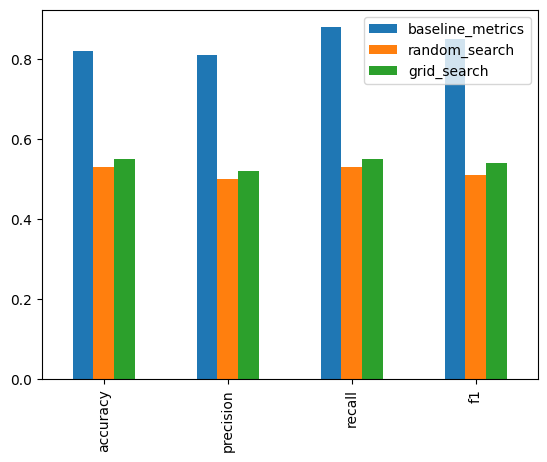

In [18]:
#let us compare all three metrics:
compare_metrics = pd.DataFrame({
    "baseline_metrics" : baseline_metrics,
    "random_search" : rs_metrics,
    "grid_search" : gs_metrics
})
compare_metrics.plot.bar()